In [8]:
#importing data from MNIST  + how to save model with its parameters
import tensorflow as tf 
mnist = tf.keras.datasets.mnist

In [14]:
#Divide Data
(x_train , y_train) , ( x_test , y_test) = mnist.load_data()

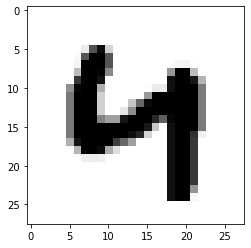

4


In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.imshow(x_train[222] , cmap= plt.cm.binary)
plt.show()

print(y_train[222])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

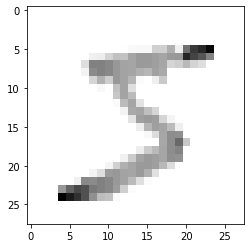

In [18]:
## normalization first way 
#x_train , x_test = x_train/255.0 , x_test/255.0 

# normalization second way 
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)


print(x_train[0])
plt.imshow(x_train[0] , cmap=plt.cm.binary)
plt.show()

In [19]:
## construct Model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),                             
    tf.keras.layers.Dense(128 , activation=tf.nn.relu), 
    tf.keras.layers.Dense(128 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10 , activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer ='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [21]:
#Training model 
model.fit(x_train , y_train , epochs= 3) 

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2697 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1092 - accuracy: 0.9660
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0734 - accuracy: 0.9767


In [23]:
model.evaluate(x_test , y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.0907 - accuracy: 0.9713


NameError: name 'val_loss' is not defined

In [24]:
## Save model 

model.save('kerasNN.model')
new_model=tf.keras.models.load_model("kerasNN.model")
predictions = new_model.predict(x_test) 
print(predictions)

INFO:tensorflow:Assets written to: kerasNN.model\assets
[[2.3208140e-09 1.9574710e-08 7.6554126e-05 ... 9.9987006e-01
  5.3538191e-08 1.1652393e-07]
 [3.6074331e-07 6.4035400e-04 9.9935073e-01 ... 7.8573184e-09
  7.1027394e-08 1.0579260e-10]
 [3.7810661e-08 9.9977177e-01 2.6852515e-06 ... 1.1042122e-04
  3.2194283e-05 7.9724623e-07]
 ...
 [1.4347603e-08 1.4636685e-06 3.8905154e-07 ... 1.4472869e-04
  3.5787591e-05 3.5369018e-04]
 [1.0637248e-06 4.5316963e-08 4.8252201e-07 ... 5.7067660e-07
  7.9729572e-05 8.6442267e-09]
 [5.4457814e-08 1.2834946e-07 1.3651320e-05 ... 3.6302436e-10
  5.6192926e-06 4.7669535e-10]]


7


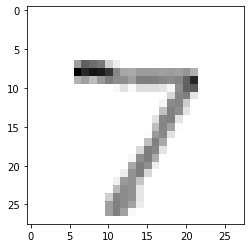

In [25]:
import numpy as np 
print(np.argmax(predictions[0]))
plt.imshow(x_test[0] , cmap = plt.cm.binary)
plt.show()